In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt

In [4]:
import pickle as pickle
import csv as csv

In [5]:
riskfactor_file = '/content/drive/My Drive/Colab Notebooks/data_1/underwritingriskfactor.csv'
riskfactor_data = pd.read_csv(riskfactor_file, sep=',')

In [6]:
riskfactor_data.head()

,age_class,overweight,ped,ped2,smoking,alcoholic,undergoneProcedure,risk_factor
0,20,0,0,0,0,0,0,0.00
1,30,0,0,0,0,0,0,0.00
2,40,0,0,0,0,0,0,0.02
3,50,0,0,0,0,0,0,0.05
4,60,0,0,0,0,0,0,0.07


In [7]:
riskfactor_data.describe()

,age_class,overweight,ped,ped2,smoking,alcoholic,undergoneProcedure,risk_factor
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,40.000000,0.483871,0.322581,0.387097,0.419355,0.387097,0.290323,0.149484
std,14.187977,0.501360,0.468979,0.488665,0.495053,0.488665,0.455383,0.060547
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
75%,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000
max,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.330000


In [16]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100
                                  , random_state = 34) 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = riskfactor_data['risk_factor'].values


In [11]:
X = riskfactor_data[['age_class', 'overweight','ped','ped2','smoking', 'alcoholic', 'undergoneProcedure']].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=34, verbose=0, warm_start=False)

In [18]:
y_output = regressor.predict(X_test)

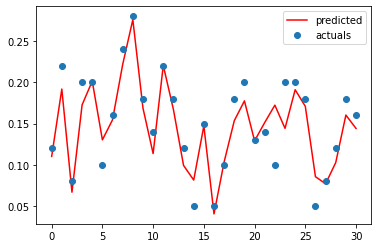

In [19]:
plt.plot(y_output, 'r-', label='predicted')
plt.plot(y_test, 'o', label='actuals')
plt.legend(loc='best')
plt.show()

In [20]:
regressor.predict([[55, 0,0,0,0,0,0]])

array([0.0735])

In [21]:
regressor.predict([[25, 0,0,0,0,0,0]])

array([0.0059])

In [22]:
regressor.predict([[65, 0,0,0,0,0,0]])

array([0.1219])

In [23]:
regressor.predict([[65, 0,1,1,0,0,1]])

array([0.2021])

In [24]:
regressor.predict([[65, 1,1,1,1,1,0]])

array([0.2753])

In [25]:
regressor.predict([[35, 1,1,1,1,1,0]])

array([0.2106])

In [26]:
regressor.predict([[20, 1,1,1,1,1,0]])

array([0.1848])

In [27]:
regressor.predict([[65, 0,1,1,0,0,0]])

array([0.1959])

In [28]:
regressor.predict([[63, 0,1,1,0,0,0]])

array([0.1959])

In [29]:
regressor.predict([[60, 0,1,1,0,0,0]])

array([0.1959])

In [30]:
regressor.predict([[60, 0,0,1,0,0,0]])

array([0.1472])

In [34]:
filename = '/content/drive/My Drive/Colab Notebooks/data_1/underwritingModel.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [36]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8273259993704752
